In [1]:
from pytube import YouTube
from pytube import Channel
from pytube import extract
import pandas as pd
from collections import defaultdict
import os

In [2]:
import logging

logging.basicConfig(level=logging.DEBUG, filename='video_metadata_2.log', 
                    format='%(asctime)s : %(levelname)s : %(message)s',
                    datefmt='%d-%b-%y %H:%M:%S')

In [5]:
file_test = 'video_urls_FULL.csv'
df = pd.read_csv(file_test)
df = df.sample(frac = 0.2, random_state=495).drop(columns='Unnamed: 0')

Object `df.sample` not found.


In [ ]:
#df = df[255:265].reset_index(drop= True)

In [6]:
df.shape

(9306, 2)

In [7]:
def itags(youtube_video, url):
    # Create a youtube object to use the API
    try: 
        itag_lst = youtube_video.streams.filter(only_video=True).asc()#.first().itag # get the highest resolution possible

        if len(itag_lst) >= 2:
            bests = [itag_lst[i].itag for i in range(0,2)]
        elif len(itag_lst) == 1:
            bests = [itag_lst.itag, None]
        else:
            logging.info(f'The lenght of itag_list is zero for video {url}')
            bests = [None]*2
    except:
        logging.info(f'Itags not retrieved. Video: {url}')
        bests = bests = [None]*2
        

    return bests

In [ ]:
YouTube('youtube.com/watch?v=wXuGxwY6h54').streams#.filter(only_video=True).asc()

In [8]:
def video_metadata_v2(df):
    keys = ['channel', 'url', 'id', 'title', 'author', 'description', 'keywords', 'length_in_secs', 
            'nbr_views', 'age_resticted', 'publication_date', 'rating','best_itag','sec_itag']

    metadata = defaultdict(list)

    for idx in range(0,df.shape[0]):

        # Access the video url from data frame
        video_url = df['url'].iloc[idx]
        #print(f'Video_url: {video_url}')
        channel_name = df['channel'].iloc[idx]
        #print(f'Channel: {channel_name}')

        # Create a youtube object to use the API
        yt = YouTube(video_url)

        # Get itags
        itag_lst = itags(yt,video_url)
        
        # Extract metadata
        info = [channel_name, video_url, extract.video_id(video_url), yt.title, yt.author, yt.description,
        yt.keywords, yt.length, yt.views, yt.age_restricted, yt.publish_date, yt.rating, itag_lst[0],itag_lst[1]]

        # Store in dictionary 
        for k, v in zip(keys,info):
            metadata[k].append(v)
                    
        # Track 
        if idx % 100 == 0:
            print(f'We are in video {idx} in channel {yt.author}')

    return metadata


In [9]:
# Getting all the metadata 
info = video_metadata_v2(df)

We are in video 0 in channel UGT FICA
We are in video 100 in channel Lärarförbundet
We are in video 200 in channel CISL - Confederazione Italiana Sindacati Lavoratori
We are in video 300 in channel FNP CISL Nazionale
We are in video 400 in channel Sindacato CISL Veneto
We are in video 500 in channel Uilca Nazionale
We are in video 600 in channel Fim Cisl Stampa
We are in video 700 in channel Norsk Sykepleierforbund
We are in video 800 in channel Landsorganisasjonen i Norge
We are in video 900 in channel LAB Sindikatua
We are in video 1000 in channel CSIF Nacional
We are in video 1100 in channel UGTPV
We are in video 1200 in channel CISL - Confederazione Italiana Sindacati Lavoratori
We are in video 1300 in channel FSS-CCOO
We are in video 1400 in channel UGT - Unión General de Trabajadoras y Trabajadores
We are in video 1500 in channel Musikerförbundet
We are in video 1600 in channel FeSMC UGT
We are in video 1700 in channel Unión Sindical Obrera Confederal
We are in video 1800 in chan

In [4]:
info

NameError: name 'info' is not defined

In [3]:
df_meta = pd.DataFrame.from_dict(info)
df_meta

NameError: name 'pd' is not defined

In [2]:
itags = df_meta[['best_itag', 'sec_itag']]

NameError: name 'df_meta' is not defined

In [13]:
itags['best_itag'] = itags['best_itag'].fillna(400).astype(int)
itags['sec_itag']=itags['sec_itag'].fillna(400).astype(int)

/var/folders/3m/rx3d7q5d0nbdsfzq7tmpgznw0000gn/T/ipykernel_99558/3333790595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itags['best_itag'] = itags['best_itag'].fillna(400).astype(int)
/var/folders/3m/rx3d7q5d0nbdsfzq7tmpgznw0000gn/T/ipykernel_99558/3333790595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  itags['sec_itag']=itags['sec_itag'].fillna(400).astype(int)


<AxesSubplot:>

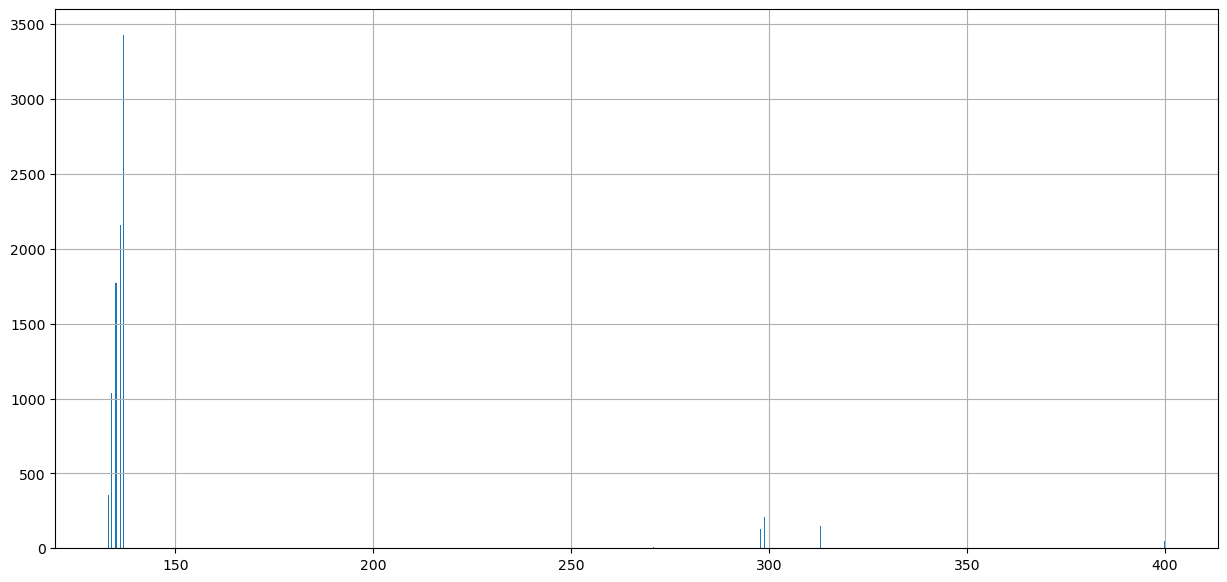

In [14]:
itags['best_itag'].hist(bins=1000,figsize=(15,7))

In [1]:

file_test = 'test_videos_metadata.csv'
df_meta.to_csv(file_test)#df = pd.read_csv(file_test)

NameError: name 'df_meta' is not defined